In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # calculate accuracy

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import time
from datetime import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

If running the code above there should be three lines which shows were the data is store

***

## Import data

Next the required training and test data will be imported

In [3]:
train_data = pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("data/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


***

## Explore a pattern

In this part we should get in touch with our first data analysis pattern for this competition.

In [5]:
women_data = train_data.loc[train_data.Sex == 'female']["Survived"]
men_data   = train_data.loc[train_data.Sex == 'male']["Survived"]
 
rate_women = sum(women_data)/len(women_data) * 100
rate_men   = sum(men_data)/len(men_data) * 100

p_woman    = (len(women_data)*100)/len(train_data)
p_men      = (len(men_data)*100)/len(train_data)

print("%-Woman | %-Men")
print(" ", math.ceil(p_woman), "   |  ", math.ceil(p_men))
print("Women survived:", rate_women)
print("Men   survived:", rate_men)


%-Woman | %-Men
  36    |   65
Women survived: 74.20382165605095
Men   survived: 18.890814558058924


As you will see there were more mens than women's on the titanic. But the women's had a higher survival rate than the mens.

To take this further and relate it to our exercise from the lecture, the same approach is taken but with the ticket class

In [6]:
min_class = min(train_data.Pclass)
max_class = max(train_data.Pclass)
print("Min Class:", min_class)
print("Max Class:", max_class)

class_1_data = train_data.loc[train_data.Pclass == 1]["Survived"]
class_2_data = train_data.loc[train_data.Pclass == 2]["Survived"]
class_3_data = train_data.loc[train_data.Pclass == 3]["Survived"]

rate_1_class = sum(class_1_data)/len(class_1_data) * 100
rate_2_class = sum(class_2_data)/len(class_2_data) * 100
rate_3_class = sum(class_3_data)/len(class_3_data) * 100

print("1 Class survived:", math.ceil(rate_1_class), "%")
print("2 Class survived:", math.ceil(rate_2_class), "%")
print("3 Class survived:", math.ceil(rate_3_class), "%")

Min Class: 1
Max Class: 3
1 Class survived: 63 %
2 Class survived: 48 %
3 Class survived: 25 %


In [6]:
id_class_data = pd.crosstab(train_data.PassengerId, train_data.Pclass)
pd.crosstab(train_data.PassengerId, train_data.Pclass)

Pclass,1,2,3
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,0,0,1
...,...,...,...
887,0,1,0
888,1,0,0
889,0,0,1


*** 

## Linear Regression

Ignore this part, thats just a working zone...

In [172]:
x = pd.crosstab(train_data.PassengerId, train_data.Pclass)

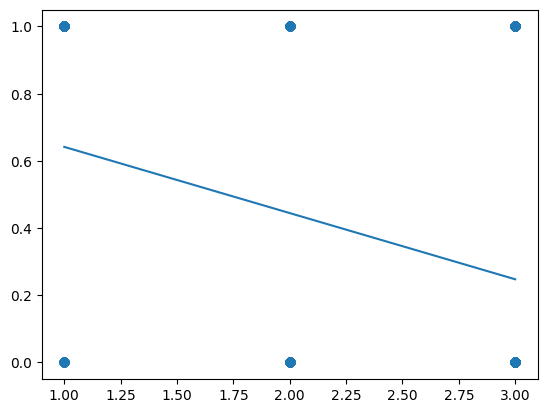

In [13]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create random data with numpy, and plot it with matplotlib:
x = np.array(train_data.Pclass)
#print(len(x))
y = np.array(train_data.Survived)
#print(len(y))

x_test = np.array(test_data.Pclass)

# Create a linear regression model based the positioning of the data and Intercept, and predict a Best Fit:
model = LinearRegression(fit_intercept=True)
#print(x[:, np.newaxis])
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(1, 3, len(train_data))
xfit_test = np.linspace(1, 3, len(test_data))

train_prediction = model.predict(xfit[:, np.newaxis])
prediction = model.predict(xfit[:, np.newaxis])

# Plot the estimated linear regression line with matplotlib:
plt.scatter(x, y)
plt.plot(xfit, train_prediction);
plt.show()
#print(xfit)
#acc = accuracy_score(y, train_prediction)
#print("Accuracy: ~", math.ceil(acc * 100), "%")

***

## Logistic Regression

Like requested we should do the same using Logistic Regression

Also just using the `Pclass` of the training data to predict if a passenger will survivey leads to a accuracy of ~68%.
Uploading the data to **kaggles** submission will show that either the *Random Forest Model* and the *Logistic Regression* will match with a score of **0.67224**.

To determine the accuracy the training data will further be splitted into test and training data sets. Therefore the `train_test_split` function is used to split the data-set into 80/20 parts.

Running the code below more than once will show, that the accuracy 


In [7]:
from sklearn.model_selection import train_test_split

x, x_tt = train_test_split(train_data, test_size=0.2) #Split data into a trainining set = x and a test training set = x_tt to calculate accuracy later

model = LogisticRegression() #Setup the model

y      = x["Survived"]      #specify the y-value to train the model
y_tt   = x_tt["Survived"]   #do the same for the training test data set

features = ["Pclass"] #specify the features using a list to play with the parameters later
x      = pd.get_dummies(x[features]) #define the training input data
x_tt   = pd.get_dummies(x_tt[features])  #defines the training test data to calculate accuracy

x_test = pd.get_dummies(test_data[features]) #define the real test data input

model.fit(x, y) #train the model with the training data

predictions_train = model.predict(x_tt) #prediction using the test training data set

predictions       = model.predict(x_test) #prediction using the real test data provided by kaggle

acc = accuracy_score(y_tt, predictions_train)
print("Accuracy: ~", math.ceil(acc * 100), "%")

Accuracy: ~ 70 %


### Logistic Regression Expand

Adding more features like the age requires a data manipulation cause there are `NaN` values in.

Running the code below and see the age of Passenger 6 (Mr. James) is missing...


In [59]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


This will be fixed with adding a age to all `NaN` age values. We will take the median as age for passengers where age is not set.

Running the code bellow will show, that the missing value is now filled.

In [60]:
train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)
train_data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q


Also it is recommonded to convert string values to numerical values which can be done using `pandas` `get_dummies` function. Play the two code parts below to the the diffrence

In [185]:
train_data["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [8]:
pd.get_dummies(train_data["Sex"])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


The code bellow does all the covered points from above and generates a `predictions` which can be exported and uploades to **kaggle** like definded at the end of this notebook

In [184]:
from sklearn.model_selection import train_test_split

train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True) #Fill missing age in train data
test_data["Age"].fillna(test_data["Age"].median(skipna=True), inplace=True)   #Fill missing age in test data

x, x_tt = train_test_split(train_data, test_size=0.2) #Split data into a trainining set = x and a test training set = x_tt to calculate accuracy later

model = LogisticRegression() #Setup the model

y      = x["Survived"]      #specify the y-value to train the model
y_tt   = x_tt["Survived"]   #do the same for the training test data set

features = ["Pclass", "Age"] #specify the features using a list to play with the parameters later
x      = pd.get_dummies(x[features]) #define the training input data
x_tt   = pd.get_dummies(x_tt[features])  #defines the training test data to calculate accuracy

x_test = pd.get_dummies(test_data[features]) #define the real test data input

model.fit(x, y) #train the model with the training data

predictions_train = model.predict(x_tt) #prediction using the test training data set

predictions       = model.predict(x_test) #prediction using the real test data provided by kaggle

acc = accuracy_score(y_tt, predictions_train)
print("Accuracy: ~", math.ceil(acc * 100), "%")

Accuracy: ~ 77 %


***

## Random forest model

This model was given by the tutorial. To determine the accuracy the `accuracy_score` function was used comparing the train_data with its own prediction.

Using features like described in the tutorial `features = ["Pclass", "Sex", "SibSp", "Parch"]` there should be a accuracy from round about 82%.

Using only `features = ["Pclass"]` will "only" lead to a accuracy of 68 %

In [16]:
y = train_data["Survived"]

features = ["Pclass"]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
train_prediction = model.predict(X)

acc = accuracy_score(y, train_prediction)
print("Accuracy: ~", math.ceil(acc * 100), "%")

Accuracy: ~ 68 %


### Random forest expand

The Code part bellow will expand the previous treated ML model the random forest. Therefore it covers the requirements of the exercise (2f).

In [3]:
from sklearn.model_selection import train_test_split

train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

train_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True) #Fill missing age in train data
test_data["Age"].fillna(test_data["Age"].median(skipna=True), inplace=True)   #Fill missing age in test data

x, x_tt = train_test_split(train_data, test_size=0.2) #Split data into a trainining set = x and a test training set = x_tt to calculate accuracy later

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1) #Setup the model

y      = x["Survived"]      #specify the y-value to train the model
y_tt   = x_tt["Survived"]   #do the same for the training test data set

features = ["Pclass", "Age", "Sex", "SibSp", "Parch"] #specify the features using a list to play with the parameters later
x      = pd.get_dummies(x[features]) #define the training input data
x_tt   = pd.get_dummies(x_tt[features])  #defines the training test data to calculate accuracy

x_test = pd.get_dummies(test_data[features]) #define the real test data input

model.fit(x, y) #train the model with the training data

predictions_train = model.predict(x_tt) #prediction using the test training data set

predictions       = model.predict(x_test) #prediction using the real test data provided by kaggle

acc = accuracy_score(y_tt, predictions_train)
print("Accuracy: ~", math.ceil(acc * 100), "%")

Accuracy: ~ 85 %


It may would be a idea to add the cabin to the features but as many values are missing and the cabin number is not a ordinal value it would be difficult to use it. Anyway it would be possible to get a correlation between the between the pure presence of a cabin and the survival rate.

*** 

## Export submission

This part is needed to export the calculated `prediction` as a `.csv` file

In [8]:
import os

timestamp = time.time()
timestamp = datetime.fromtimestamp(timestamp).strftime("%H_%M_%S")
print(timestamp)

predictions #Enhält die Predictions 0 für Tod 1 für Survived
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

filename = 'my_submission_' + timestamp + '.csv'
fileDir = os.path.join("export", filename)

output.to_csv(fileDir, index=False)
print("Your submission was successfully saved!")
print(fileDir)

14_22_55
Your submission was successfully saved!
export\my_submission_14_22_55.csv
